<a href="https://colab.research.google.com/github/misharigot/kobe/blob/master/src/model/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook contains the neural network to predict kobe's shots.

In [27]:
import sys; sys.path.insert(0, '..')  # Needed to make the import below work

from multiple_train_test_splits import MultipleTrainTestSplits
from preprocessor import Preprocessor

import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# from mlxtend.plotting import plot_decision_regions


%matplotlib inline

In [28]:
def get_x(data: pd.DataFrame) -> pd.DataFrame:
    """Returns the features.
    """
    X = data.drop(columns=['shot_made_flag'])
    return X

def get_y(data: pd.DataFrame) -> pd.Series:
    """Returns the target.
    """
    Y = data['shot_made_flag'].copy()
    return Y


In [33]:
mtts = MultipleTrainTestSplits(csv_path='../../data/data.csv')
pp = Preprocessor('../../data/data.csv')

test_set = mtts.test_set

loss_and_metrics = []
scores = []

test_range = range(1, 4)
# all_averages = []
accuracies = {}

for tests in test_range:
    accuracies[test_range] = {}
    fold = 0
    i = 0
    averages = []
    print("Run -")
    for train_set, validation_set in mtts.train_validation_split(as_dataframe=True):
        fold += 1
        i += 1
        # Preprocess the training set
       # Preprocess the training set
        preprocessed_train_set = pp.preprocess(train_set)
        # Split the features from the target
        x_train = get_x(preprocessed_train_set)
        y_train = get_y(preprocessed_train_set)

        # Preprocess the validation set (use the one hot encoder that was fit on the training set)
        preprocessed_validation_set = pp.preprocess(validation_set)
        # Split the features from the target
        x_validation = get_x(preprocessed_validation_set)
        y_validation = get_y(preprocessed_validation_set)



        tree = DecisionTreeClassifier()
        tree.fit(x_train, y_train.astype('int'))
        y_predicted = tree.predict(x_validation)
        accuracy = accuracy_score(y_validation.astype('int'), y_predicted.astype('int'))
        accuracies[test_range][fold] = accuracy
        
        averages.append(accuracy)
        
        print(f' i: {i} - acc: {accuracy}')

    all_averages = (sum(averages)/len(averages)
    print(all_averages)
    scores.append(all_averages)
    depth = tree.get_depth()
    params = tree.get_params(deep=True)
    
    
    print()
    print('Tree depth is: ', depth)
    print()
    print('Params of the tree are: ', params)


Run - 1
 i: 1 - acc: 0.6359213854835571
 i: 2 - acc: 0.6186028410196537
 i: 3 - acc: 0.6077057793345009

Tree depth is:  96

Params of the tree are:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
Run - 1
 i: 1 - acc: 0.6164623467600701
 i: 2 - acc: 0.6178244794707142
 i: 3 - acc: 0.6170461179217747

Tree depth is:  105

Params of the tree are:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
Run - 1
 i: 1 - acc: 0.624635143023

In [ ]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(np.array(test_range), np.array(scores))
plt.xlabel('Number of the test')
plt.ylabel('Testing Accuracy')

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

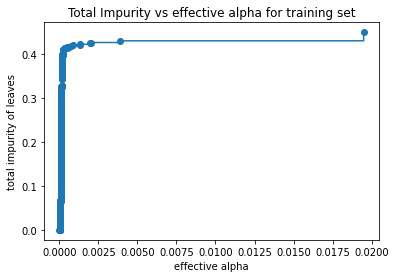

In [36]:
path = tree.cost_complexity_pruning_path(x_train, y_train.astype('int'))
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(x_train, y_train.astype('int'))
    clfs.append(tree)
print("Number of nodes in the last tree is: {} with ccpalpha: {}".format(
      clfs[-1].tree.node_count, ccp_alphas[-1]))

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

nodecounts = [clf.tree.nodecount for clf in clfs]
depth = [tree.tree.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [32]:
def print_average_metrics(accuracies):
    for k, folds in accuracies.items():
        accs = []
        for i, acc in folds.items():
           
            accs.append(acc)
        print(sum(accs)/len(folds))
    



print_average_metrics(accuracies)

0.6230784199260556


In [ ]:
classes = model.predict(x_validation, batch_size=128)
classes